In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [4]:
df = pd.read_csv("D:\\ITI\Python\\ITI_Python_for_Data_Management\\Extraction\\Information_Mart\\Fact_Table.csv")
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
C:\Users\Abdelrahman\AppData\Local\Temp\ipykernel_18912\1823693600.py:1: SyntaxWarning: invalid escape sequence '\P'
  df = pd.read_csv("D:\\ITI\Python\\ITI_Python_for_Data_Management\\Extraction\\Information_Mart\\Fact_Table.csv")


,Unnamed: 0,orderID_orders,customer_id,order_status,order_date,required_date,shipped_date,store_id,staff_id,Extraction_Date_orders,...,source_RateExchange,list_price_egp,product_id_items,product_name,brand_id,category_id,model_year,list_price_items,Extraction_Date_items,source_items
0,0,1,259,4,2016-01-01,2016-01-03,2016-01-03,1,2,2024-05-01 11:37:28.021257401,...,api,28719.421335,1,Trek 820 - 2016,9,6,2016,379.99,2024-05-01 11:42:23.564626217,datalack
1,1,2,1212,4,2016-01-01,2016-01-04,2016-01-03,2,6,2024-05-01 11:37:28.021257401,...,api,28719.421335,2,Ritchey Timberwolf Frameset - 2016,5,6,2016,749.99,2024-05-01 11:42:23.564626217,datalack
2,2,3,523,4,2016-01-02,2016-01-05,2016-01-03,2,7,2024-05-01 11:37:28.021257401,...,api,28719.421335,3,Surly Wednesday Frameset - 2016,8,6,2016,999.99,2024-05-01 11:42:23.564626217,datalack
3,3,4,175,4,2016-01-03,2016-01-04,2016-01-05,1,3,2024-05-01 11:37:28.021257401,...,api,28719.421335,4,Trek Fuel EX 8 29 - 2016,9,6,2016,2899.99,2024-05-01 11:42:23.564626217,datalack
4,4,5,1324,4,2016-01-03,2016-01-06,2016-01-06,2,6,2024-05-01 11:37:28.021257401,...,api,47866.021335,5,Heller Shagamaw Frame - 2016,3,6,2016,1320.99,2024-05-01 11:42:23.564626217,datalack


# Order Status Distibution

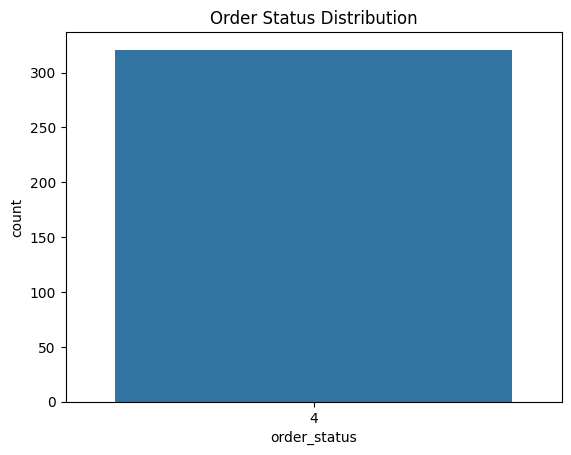

In [5]:
sns.countplot(x='order_status', data=df)
plt.title('Order Status Distribution')
plt.show()

# Late Delivery vs. Order Status

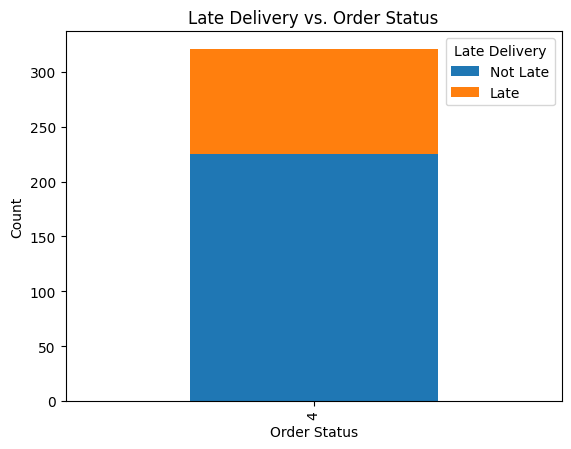

In [9]:
late_delivery_status = df.groupby(['order_status', 'late_delivery']).size().unstack(fill_value=0)
late_delivery_status.plot(kind='bar', stacked=True)
plt.title('Late Delivery vs. Order Status')
plt.xlabel('Order Status')
plt.ylabel('Count')
plt.legend(title='Late Delivery', labels=['Not Late', 'Late'])
plt.savefig('late_delivery_chart.png')
plt.show()

# Order Status Over Time

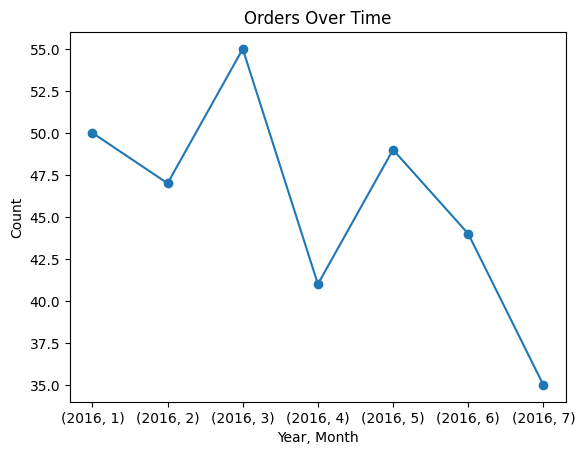

In [10]:
df['order_date'] = pd.to_datetime(df['order_date'])
orders_over_time = df.groupby([df['order_date'].dt.year, df['order_date'].dt.month]).size()
orders_over_time.plot(kind='line', marker='o')
plt.title('Orders Over Time')
plt.xlabel('Year, Month')
plt.ylabel('Count')
plt.savefig('2.png')
plt.show()

# Correlation Heatmap

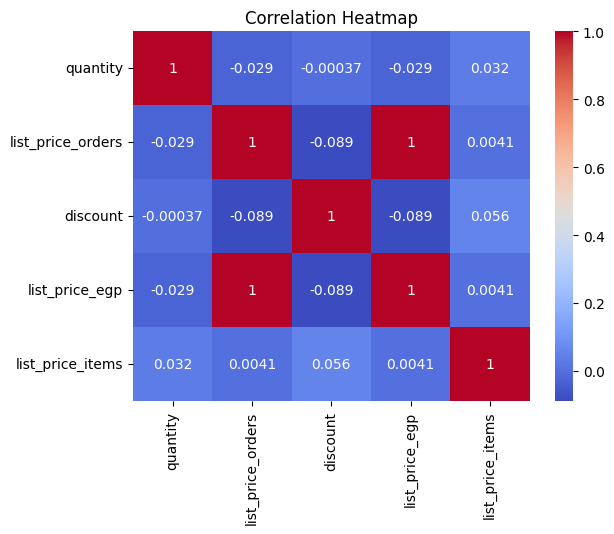

In [8]:
corr = df[['quantity', 'list_price_orders', 'discount', 'list_price_egp', 'list_price_items']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()